In [90]:
#importing neccesary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
#Loading dataset
Churn_Train=pd.read_excel("Churn.xlsx", sheet_name="Train")
Churn_Test=pd.read_excel("Churn.xlsx", sheet_name="Test")

In [92]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [93]:
Churn_Train

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,State,AreaCode
0,87,21,214.0,180.0,134.5,10.6,0,0,0,1,113,36.38,114,15.30,82,6.05,5,2.86,SD,415
1,63,0,132.9,67.0,160.4,9.9,3,0,0,0,122,22.59,62,5.70,121,7.22,2,2.67,WV,510
2,103,34,138.8,142.0,183.8,11.8,1,0,0,1,80,23.60,108,12.07,77,8.27,7,3.19,DE,415
3,44,0,202.6,163.0,268.1,8.3,0,0,0,0,89,34.44,96,13.86,151,12.06,3,2.24,UT,415
4,166,0,274.3,52.9,246.1,10.9,0,0,0,0,110,46.63,109,4.50,119,11.07,5,2.94,WA,408
5,88,0,189.8,197.3,234.5,14.9,2,0,0,0,111,32.27,101,16.77,111,10.55,3,4.02,KS,415
6,160,0,174.3,171.3,220.8,8.3,0,0,0,0,105,29.63,107,14.56,131,9.94,2,2.24,GA,415
7,120,0,137.3,212.2,152.7,10.5,1,0,0,0,100,23.34,129,18.04,92,6.87,2,2.84,MA,415
8,92,0,181.4,164.5,171.0,10.9,2,0,0,0,98,30.84,98,13.98,110,7.69,4,2.94,NE,415
9,95,20,165.7,215.6,243.3,9.8,0,0,0,1,78,28.17,94,18.33,91,10.95,6,2.65,SD,408


In [94]:
Churn_Test.Churn.value_counts()

0    853
1    180
Name: Churn, dtype: int64

In [95]:
t=Churn_Train.Churn.value_counts()

In [96]:
#Percentage of Minority
t[1]/(t[0]+t[1])*100

13.173913043478262

In [97]:
Churn_Train.groupby(["Churn"]).mean()

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,IntPlan,VMailPlan,DayCalls,DayCharge,EveCalls,EveCharge,NightCalls,NightCharge,IntlCalls,IntlCharge,AreaCode
Churn,,,,,,,,,,,,,,,,,,
0,100.799700,8.557837,175.805358,199.096194,200.813020,10.155684,1.444166,0.067101,0.291938,100.142714,29.887411,99.902354,16.923435,100.211818,9.036675,4.594892,2.742539,437.887331
1,103.339934,5.524752,205.600330,209.481188,206.140594,10.744884,2.399340,0.257426,0.178218,101.042904,34.952475,100.372937,17.805908,99.366337,9.276535,4.174917,2.901617,435.412541


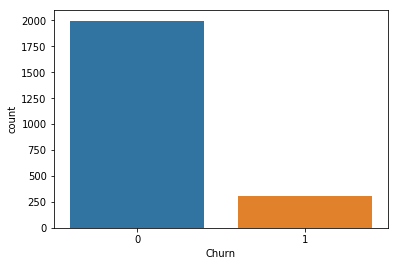

In [98]:
sns.countplot(Churn_Train.Churn)

In [101]:
#merging train and test dataset to avoid repetation of similar operations
nw=pd.concat([Churn_Train,Churn_Test])

In [102]:
#Converting Chategorical variable into Numeric variable
new_le = LabelEncoder()
nw["State_e"] = new_le.fit_transform(nw.State)
new_le = LabelEncoder()
nw["code_e"] = new_le.fit_transform(nw.AreaCode)

In [103]:
#Creating new variable
nw["Total_Charge"]=nw.DayCharge+nw.EveCharge+nw.NightCharge

In [104]:
#Adding some features
nw["pDay"]=nw.DayCharge/nw.Total_Charge*100
nw["pNight"]=nw.NightCharge/nw.Total_Charge*100
nw["pEve"]=nw.EveCharge/nw.Total_Charge*100

In [105]:
# droping Chategorical variable
nw=nw.drop(["State","AreaCode"], axis=1)

In [106]:
Churn_Test.AreaCode.isnull().value_counts()

False    1033
Name: AreaCode, dtype: int64

In [107]:
nw

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntPlan,VMailPlan,...,NightCalls,NightCharge,IntlCalls,IntlCharge,State_e,code_e,Total_Charge,pDay,pNight,pEve
0,87,21,214.0,180.0,134.5,10.6,0,0,0,1,...,82,6.05,5,2.86,41,1,57.73,63.017495,10.479820,26.502685
1,63,0,132.9,67.0,160.4,9.9,3,0,0,0,...,121,7.22,2,2.67,49,2,35.51,63.615883,20.332301,16.051816
2,103,34,138.8,142.0,183.8,11.8,1,0,0,1,...,77,8.27,7,3.19,8,1,43.94,53.709604,18.821120,27.469276
3,44,0,202.6,163.0,268.1,8.3,0,0,0,0,...,151,12.06,3,2.24,44,1,60.36,57.057654,19.980119,22.962227
4,166,0,274.3,52.9,246.1,10.9,0,0,0,0,...,119,11.07,5,2.94,47,0,62.20,74.967846,17.797428,7.234727
5,88,0,189.8,197.3,234.5,14.9,2,0,0,0,...,111,10.55,3,4.02,16,1,59.59,54.153381,17.704313,28.142306
6,160,0,174.3,171.3,220.8,8.3,0,0,0,0,...,131,9.94,2,2.24,10,1,54.13,54.738592,18.363200,26.898208
7,120,0,137.3,212.2,152.7,10.5,1,0,0,0,...,92,6.87,2,2.84,19,1,48.25,48.373057,14.238342,37.388601
8,92,0,181.4,164.5,171.0,10.9,2,0,0,0,...,110,7.69,4,2.94,29,1,52.51,58.731670,14.644830,26.623500
9,95,20,165.7,215.6,243.3,9.8,0,0,0,1,...,91,10.95,6,2.65,41,0,57.45,49.033943,19.060052,31.906005


In [138]:
#Correlation Matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,AccountLength,VMailMessage,DayMins,EveMins,NightMins,IntlMins,CustServCalls,Churn,IntPlan,VMailPlan,EvenCost,NightCost,DayCost,IntCost
AccountLength,1,-0.00462782,0.00621602,-0.00675714,-0.00895519,0.0095139,-0.00379594,0.0165407,0.0247347,0.00291841,0.00802806,-0.0137395,0.0240613,0.0199296
VMailMessage,-0.00462782,1,0.000778274,0.017562,0.00768114,0.0028562,-0.0132626,-0.089728,0.00874549,0.956927,0.0123204,0.00990533,-0.00758531,0.0207749
DayMins,0.00621602,0.000778274,1,0.00704251,0.00432337,-0.0101546,-0.0134232,0.205151,0.0493958,-0.00168407,0.0120574,0.0170125,0.825319,0.00938468
EveMins,-0.00675714,0.017562,0.00704251,1,-0.0125837,-0.0110347,-0.0129846,0.0927958,0.0191,0.021545,0.767496,-0.00683239,-0.00679891,-0.00385153
NightMins,-0.00895519,0.00768114,0.00432337,-0.0125837,1,-0.0152073,-0.00928761,0.0354929,-0.0289048,0.00607866,-0.00879352,0.782025,0.0138117,-0.0165125
IntlMins,0.0095139,0.0028562,-0.0101546,-0.0110347,-0.0152073,1,-0.00963968,0.0682388,0.0458707,-0.00131787,-0.00176963,-0.0193785,0.00192756,0.440812
CustServCalls,-0.00379594,-0.0132626,-0.0134232,-0.0129846,-0.00928761,-0.00963968,1,0.20875,-0.024522,-0.0178239,-0.0079369,-0.0128377,-0.0171353,-0.0189944
Churn,0.0165407,-0.089728,0.205151,0.0927958,0.0354929,0.0682388,0.20875,1,0.259852,-0.102148,0.0821843,0.0308891,0.185506,-0.0128481
IntPlan,0.0247347,0.00874549,0.0493958,0.0191,-0.0289048,0.0458707,-0.024522,0.259852,1,0.00600637,0.0181351,-0.0155879,0.0417613,0.0362391
VMailPlan,0.00291841,0.956927,-0.00168407,0.021545,0.00607866,-0.00131787,-0.0178239,-0.102148,0.00600637,1,0.0145198,0.0146235,-0.010462,0.0150226


In [108]:
# spliting merged dataset to Train and Test
# Train
C=nw[:2300].drop(["Churn"],axis=1)
y=nw[:2300].Churn

In [109]:
#Test dat
test=nw[2300:].drop(["Churn"],axis=1)
act=nw[2300:].Churn

In [110]:
nw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 1032
Data columns (total 24 columns):
AccountLength    3333 non-null int64
VMailMessage     3333 non-null int64
DayMins          3333 non-null float64
EveMins          3333 non-null float64
NightMins        3333 non-null float64
IntlMins         3333 non-null float64
CustServCalls    3333 non-null int64
Churn            3333 non-null int64
IntPlan          3333 non-null int64
VMailPlan        3333 non-null int64
DayCalls         3333 non-null int64
DayCharge        3333 non-null float64
EveCalls         3333 non-null int64
EveCharge        3333 non-null float64
NightCalls       3333 non-null int64
NightCharge      3333 non-null float64
IntlCalls        3333 non-null int64
IntlCharge       3333 non-null float64
State_e          3333 non-null int32
code_e           3333 non-null int64
Total_Charge     3333 non-null float64
pDay             3333 non-null float64
pNight           3333 non-null float64
pEve             333

In [140]:
# Created Fucnction to Evaluate model
def conf(y2,predicted):
    print("Confusion Matrix:")
    print(confusion_matrix(y2,predicted))
    print("Precision: ", sklearn.metrics.precision_score(y2,predicted)*100)
    print("Recall: ", sklearn.metrics.recall_score(y2,predicted)*100)
    print("F1_score: ", sklearn.metrics.f1_score(y2,predicted)*100)   

# Random Forest

In [111]:
#Loading Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import sklearn

In [112]:
clf= RandomForestClassifier(n_estimators=100)

In [113]:
model=clf.fit(C,y)

In [114]:
predict=model.predict(test)

In [115]:
from sklearn.metrics import confusion_matrix

In [116]:
tn, fp, fn, tp=confusion_matrix(act,predict).ravel()
prec=tp/(tp+fp)*100
recall=tp/(tp+fn)*100

In [117]:
conf(act,predict)

Confusion Matrix:
[[851   2]
 [ 44 136]]
Precision:  98.55072463768117
Recall:  75.55555555555556
F1_score:  85.53459119496856


In [118]:
confusion_matrix(act,predict)

array([[851,   2],
       [ 44, 136]], dtype=int64)

In [119]:
print(prec,recall)

98.55072463768117 75.55555555555556


In [121]:
#Running Random Forest model on different Estimators
def randomF(x_train,y_train,x_test,y_test):
    result=pd.DataFrame()
    e=[]
    p=[]
    r=[]
    f=[]
    for i in np.arange(50,500,50):
        clf= RandomForestClassifier(n_estimators=i)
        predict=clf.fit(x_train,y_train).predict(x_test)
        tn, fp, fn, tp=confusion_matrix(y_test,predict).ravel()
        prec=tp/(tp+fp)*100
        recall=tp/(tp+fn)*100
        f1=2*prec*recall/(prec+recall)
        e.append(i)
        p.append(prec)
        r.append(recall)
        f.append(f1)
    result["Estimator"]=e
    result["Precision"]=p
    result["Recall"]=r
    result["F1_Score"]=f
    return(result)

In [123]:
randomF(C,y,test,act)

,Estimator,Precision,Recall,F1_Score
0,50,99.264706,75.000000,85.443038
1,100,97.902098,77.777778,86.687307
2,150,98.561151,76.111111,85.893417
3,200,98.518519,73.888889,84.444444
4,250,98.540146,75.000000,85.173502
5,300,98.571429,76.666667,86.250000
6,350,98.561151,76.111111,85.893417
7,400,98.571429,76.666667,86.250000
8,450,98.561151,76.111111,85.893417


 # SVM

In [126]:
from sklearn.svm import LinearSVC

In [136]:
svm=LinearSVC()

In [137]:
mod=svm.fit(C,y)

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [138]:
pred=mod.predict(test)

In [139]:
conf(act,pred)

Confusion Matrix:
[[294 559]
 [ 13 167]]
Precision:  23.002754820936637
Recall:  92.77777777777779
F1_score:  36.86534216335541


# Kfold on Random() function

In [141]:
from sklearn.model_selection import KFold

In [142]:
kfold=KFold(5,True, 0)

In [145]:
for train_k, test_k in kfold.split(nw):
    y1=train_1.Churn
    x1=train_1.drop(["Churn"],axis=1)
    y2=test_1.Churn
    x2=test_1.drop(["Churn"],axis=1)
    print(randomF(x1,y1,x2,y2))

   Estimator  Precision     Recall   F1_Score
0         50  98.540146  75.000000  85.173502
1        100  98.518519  73.888889  84.444444
2        150  98.550725  75.555556  85.534591
3        200  98.484848  72.222222  83.333333
4        250  98.591549  77.777778  86.956522
5        300  98.581560  77.222222  86.604361
6        350  98.581560  77.222222  86.604361
7        400  98.591549  77.777778  86.956522
8        450  98.571429  76.666667  86.250000
   Estimator  Precision     Recall   F1_Score
0         50  97.841727  75.555556  85.266458
1        100  97.841727  75.555556  85.266458
2        150  98.591549  77.777778  86.956522
3        200  98.561151  76.111111  85.893417
4        250  98.561151  76.111111  85.893417
5        300  98.571429  76.666667  86.250000
6        350  98.571429  76.666667  86.250000
7        400  98.581560  77.222222  86.604361
8        450  98.581560  77.222222  86.604361
   Estimator  Precision     Recall   F1_Score
0         50  98.561151  76.111111

# Use of GridSearchCV using Random Forest on paramters ie n_estimators and Max_Depth

In [146]:
 from sklearn.model_selection import GridSearchCV

In [147]:
e=np.arange(50,500,50)
d=np.arange(5,150,5)
esti={}
esti["n_estimators"]=e
depth={}
depth['max_depth']=d
GS=GridSearchCV(clf,param_grid=[esti,depth], cv=5)

In [148]:
model5=GS.fit(C,y)

In [149]:
pre=model5.predict(test)

In [150]:
conf(act,pre)

Confusion Matrix:
[[851   2]
 [ 41 139]]
Precision:  98.58156028368793
Recall:  77.22222222222223
F1_score:  86.6043613707165


In [151]:
GS.best_params_

{'max_depth': 55}

# Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression
#logistic without binaries
logit_model = LogisticRegression(random_state=1).fit(C,y)

C:\Users\tejas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [153]:
predic=logit_model.predict(test)

In [154]:
conf(act,predic)

Confusion Matrix:
[[835  18]
 [140  40]]
Precision:  68.96551724137932
Recall:  22.22222222222222
F1_score:  33.613445378151255


# KNN

In [155]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=1).fit(C,y)
prd=KNN.predict(test)
conf(act,prd)

Confusion Matrix:
[[766  87]
 [118  62]]
Precision:  41.61073825503356
Recall:  34.44444444444444
F1_score:  37.68996960486322


# Naive

In [161]:
from sklearn.naive_bayes import GaussianNB
Naive = GaussianNB().fit(C,y)
predt=Naive.predict(test)
conf(act,predt)

Confusion Matrix:
[[773  80]
 [ 67 113]]
Precision:  58.549222797927456
Recall:  62.77777777777778
F1_score:  60.58981233243968


# best Model=Random Forest

In [164]:
clf = RandomForestClassifier( n_estimators = 350, max_depth=50)
best_model=clf.fit(C,y)
prdt=best_model.predict(test)
conf(act,prdt)

Confusion Matrix:
[[851   2]
 [ 40 140]]
Precision:  98.59154929577466
Recall:  77.77777777777779
F1_score:  86.95652173913044


ROC AUC: 90.30


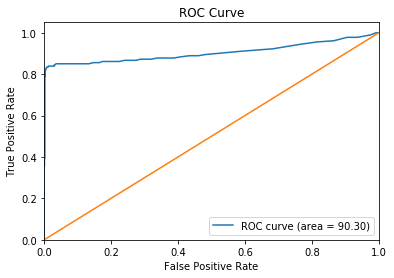

In [165]:
#Plotting ROC curve
from sklearn.metrics import roc_curve,auc,roc_auc_score
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(act, best_model.predict_proba(test)[:,1])
# Calculate the AUC
roc_auc = (auc(fpr, tpr)*100)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

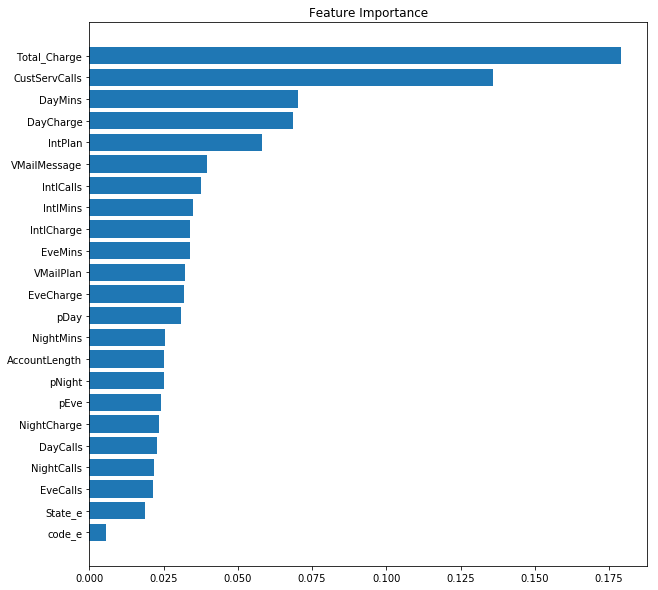

In [166]:
#Calculating feature importances
importances = best_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [C.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(10,10))
plt.title("Feature Importance")

predicted = best_model.predict(test)

compare=act
    
if isinstance(compare, pd.DataFrame):
    compare = compare.to_numpy().reshape(len(predicted),)


# Add horizontal bars
plt.barh(range(C.shape[1]),importances[indices],align = 'center')
plt.yticks(range(C.shape[1]), names)
plt.show()